# DS-SF-36 | 05 | Exploratory Data Analysis | Codealong | Wei Liao

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Activity | _pandas_

In [2]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [3]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> ### Question 1.  Subset the dataframe on the age and gender columns

In [4]:
# TODO
df[['age', 'gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


In [19]:
df.loc[:, ['age', 'gender']] # Alternative

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [5]:
# TODO (DataFrame)
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [6]:
# TODO (Series)
df['age']

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

In [13]:
df.iloc[:, 0] # Alternative

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

In [15]:
df.age # Alternative, preferred

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

In [16]:
df.loc[:, 'age'] # Alternative

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

> ### Question 3.  Subset the dataframe on the rows Bob and Carol

In [20]:
# TODO
df.loc[['Bob', 'Carol']]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [21]:
# TODO (DataFrame)
df.loc[['Eve']] #Need to use loc when selecting rows

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [22]:
# TODO (Series)
df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### Question 5.  How old is Frank?

In [24]:
# TODO
df.loc[['Frank'], 'age']

name
Frank    43
Name: age, dtype: int64

In [25]:
df.loc[['Frank']].age # Alternative

name
Frank    43
Name: age, dtype: int64

In [27]:
df.loc['Frank'].age # To get the value only

43

In [29]:
df.age['Frank'] # Alternative

43

In [30]:
df.age.Frank # Preferred alternative, similar to just one bracket

43

In [31]:
# By swapping rows and columns (transpose)
df.T.Frank.age

43

> ### Question 6.  What is the men’s mean age, the women’s median age?

In [39]:
# TODO
df[['gender', 'age']].groupby('gender').mean().loc['Male'].age

39.333333333333336

In [45]:
df[df.gender == 'Male'].groupby('gender').age.mean().Male # Alternative

39.333333333333336

In [46]:
df[df.gender == 'Male'].age.mean() # Alternative

39.333333333333336

In [48]:
df[df.gender == 'Female'].age.median()

44.0

## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [49]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-zillow.csv'), index_col = 'ID')

In [50]:
df

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",37.805103,-122.412856,12/4/15,0.7100,...,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",37.804420,-122.417389,11/30/15,2.1500,...,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",37.803728,-122.419055,11/12/15,5.6000,...,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",37.804392,-122.406590,12/11/15,1.5000,...,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",37.804240,-122.405509,1/15/16,0.9700,...,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",37.804240,-122.405509,12/17/15,0.9400,...,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",37.803748,-122.408531,12/15/15,0.8350,...,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",37.802408,-122.417537,12/4/15,2.8300,...,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",37.801889,-122.418704,1/14/16,4.0500,...,NaN,NaN,4102.0,3049.0,1948.0


### `Series.mean()` - Compute the `Series` mean value

In [51]:
df.SalePrice.mean()

1.3974229429999998

> #### Activity: What's `Size`'s mean?

In [52]:
# TODO
df.Size.mean()

1641.3009307135471

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [ ]:
# TODO

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [ ]:
# TODO

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the variance for the number of beds in the dataset?

In [ ]:
# TODO

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [ ]:
# TODO

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [ ]:
# TODO

> #### Activity: What's the median sale price for properties in the dataset?

In [ ]:
# TODO

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [59]:
df.count() # Only counts the number of values defined (duplicates are not included???)

Address        1000
Latitude       1000
Longitude      1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [60]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [61]:
df.IsAStudio.dropna().shape[0]

986

In [62]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [63]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [64]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [65]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
Latitude                                          37.7084
Longitude                                        -122.511
DateOfSale                                        1/10/16
SalePrice                                           1e-06
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> #### Activity: What are properties that were sold at the lowest price?  At what price?

In [69]:
# TODO
df[df.SalePrice == df.SalePrice.min()]

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",37.763202,-122.39627,12/23/15,0.000001,...,7.0,6.0,2904.0,2482.0,1900.0


In [70]:
df.max()

Address        San Carlos St, Carmel, CA
Latitude                         37.8054
Longitude                       -122.371
DateOfSale                        2/9/16
SalePrice                           32.7
IsAStudio                              1
Beds                                   9
Baths                                 14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> #### Activity: What are properties that were sold at the highest price?  At what price?

In [71]:
# TODO
df[df.SalePrice == df.SalePrice.max()]

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",37.786681,-122.438711,11/23/15,32.7,...,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

In [ ]:
df.quantile(.5)

In [ ]:
df.median()

In [ ]:
df.quantile(.25)

In [ ]:
df.quantile(.75)

### `.describe()` - Generate various summary statistics

In [72]:
df.describe()

,Latitude,Longitude,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,1000.000000,1000.000000,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,37.759592,-122.434777,1.397423,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,0.025311,0.031575,1.736413,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,37.708438,-122.510650,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,37.738481,-122.453501,0.800000,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,37.760234,-122.431664,1.100000,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,37.779990,-122.409767,1.532500,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,37.805426,-122.371160,32.700000,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [73]:
df.SalePrice.describe()

count    1000.000000
mean        1.397423
std         1.736413
min         0.000001
25%         0.800000
50%         1.100000
75%         1.532500
max        32.700000
Name: SalePrice, dtype: float64

In [ ]:
df.Address.describe()

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

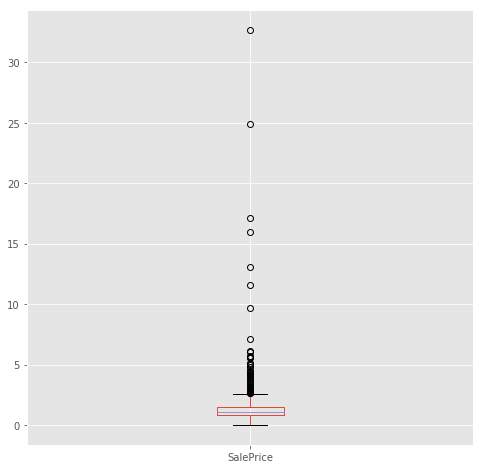

In [74]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

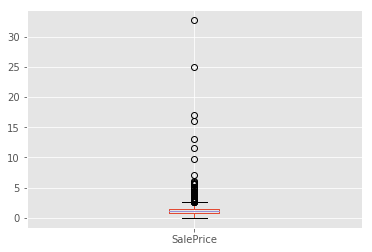

In [75]:
df[ ['SalePrice'] ].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

In [ ]:
# TODO

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

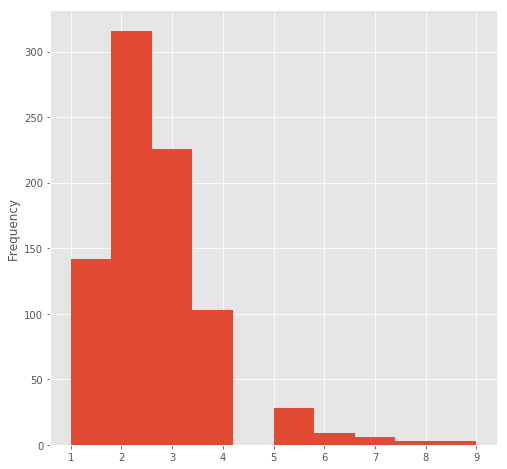

In [76]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

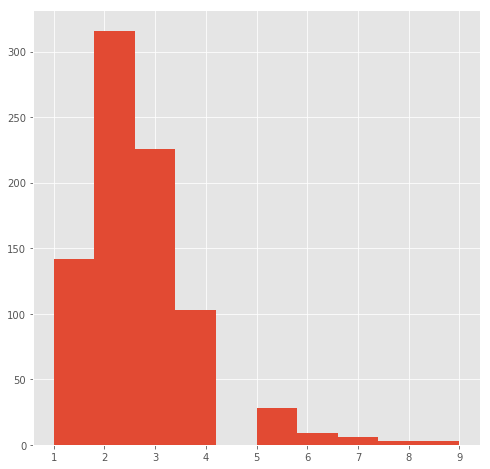

In [77]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

In [ ]:
# TODO

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [78]:
df.mode()

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",37.781386,-122.421406,11/20/15,1.1,...,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [80]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [81]:
df.Baths.mode()

0    1.0
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [82]:
df[df.Address == '1 Mono St # B, San Francisco, CA']

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
59700333,"1 Mono St # B, San Francisco, CA",37.758336,-122.443411,12/11/15,1.08,...,2.0,1.5,1142.0,NaN,1968.0
59779608,"1 Mono St # B, San Francisco, CA",37.758340,-122.443425,12/11/15,1.08,...,NaN,NaN,1142.0,NaN,1968.0


In [83]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",37.781154,-122.401649,12/7/15,0.675,...,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",37.781429,-122.401860,12/6/15,0.675,...,1.0,1.0,557.0,NaN,2010.0


In [84]:
df[df.Address == '1915 Diamond St, San Francisco, CA']

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
125156575,"1915 Diamond St, San Francisco, CA",37.742141,-122.435111,12/30/15,1.8,...,NaN,1.0,2200.0,4316.0,1910.0
2100850402,"1915 Diamond St, San Francisco, CA",37.742141,-122.435111,12/29/15,1.8,...,4.0,3.0,2400.0,4356.0,1910.0


In [85]:
df[df.Address == '1954 Golden Gate Ave, San Francisco, CA']

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
15084954,"1954 Golden Gate Ave, San Francisco, CA",37.778420,-122.443073,11/24/15,1.1,...,2.0,1.0,1515.0,NaN,1895.0
123597223,"1954 Golden Gate Ave, San Francisco, CA",37.778246,-122.442763,11/24/15,1.1,...,2.0,1.0,1275.0,NaN,1895.0


In [ ]:
df[df.Address == '2299 Market St APT 502, San Francisco, CA']

In [ ]:
df[df.Address == '643 Natoma St, San Francisco, CA']

In [ ]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

All duplicate entries...

In [86]:
df[df.DateOfSale == '11/20/15']

,Address,Latitude,Longitude,DateOfSale,SalePrice,...,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,,,
15072263,"1795 Green St, San Francisco, CA",37.796780,-122.428519,11/20/15,2.500,...,3.0,2.0,1647.0,NaN,1908.0
15073657,"1895 Pacific Ave APT 506, San Francisco, CA",37.794168,-122.426243,11/20/15,0.975,...,1.0,1.0,1165.0,NaN,1931.0
15084143,"270 Ewing Ter, San Francisco, CA",37.779676,-122.449096,11/20/15,1.570,...,2.0,1.0,1250.0,2178.0,1940.0
15093664,"591 29th Ave, San Francisco, CA",37.778174,-122.489141,11/20/15,1.750,...,3.0,2.5,1800.0,1875.0,1936.0
15100149,"806 39th Ave, San Francisco, CA",37.773556,-122.499019,11/20/15,1.050,...,NaN,1.0,1375.0,2374.0,1926.0
15104379,"1466 44th Ave, San Francisco, CA",37.759294,-122.503370,11/20/15,0.892,...,2.0,1.0,1130.0,3049.0,1926.0
15104496,"1422 42nd Ave, San Francisco, CA",37.760143,-122.501274,11/20/15,1.220,...,3.0,1.0,1325.0,2996.0,1951.0
15118458,"2279 47th Ave, San Francisco, CA",37.743999,-122.506182,11/20/15,1.030,...,4.0,3.0,2570.0,2996.0,1900.0
15124103,"2514 40th Ave, San Francisco, CA",37.739858,-122.497704,11/20/15,1.020,...,3.0,2.0,1490.0,3049.0,1945.0


In [ ]:
df[df.DateOfSale == '11/20/15'].shape[0]

In [ ]:
(df.DateOfSale == '11/20/15').sum()

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [87]:
df.corr()

,Latitude,Longitude,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
Latitude,1.000000,0.164134,0.184146,0.049120,-0.262165,-0.009636,0.035968,0.080629,0.181982
Longitude,0.164134,1.000000,-0.060019,0.060247,-0.291137,-0.122978,-0.182247,-0.060776,0.241714
SalePrice,0.184146,-0.060019,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.049120,0.060247,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,-0.262165,-0.291137,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,-0.009636,-0.122978,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.035968,-0.182247,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.080629,-0.060776,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,0.181982,0.241714,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [88]:
df.Beds.corr(df.Baths)

0.71519388432089781

### Heatmaps

In [89]:
corr = df.corr()

corr

,Latitude,Longitude,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
Latitude,1.000000,0.164134,0.184146,0.049120,-0.262165,-0.009636,0.035968,0.080629,0.181982
Longitude,0.164134,1.000000,-0.060019,0.060247,-0.291137,-0.122978,-0.182247,-0.060776,0.241714
SalePrice,0.184146,-0.060019,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.049120,0.060247,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,-0.262165,-0.291137,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,-0.009636,-0.122978,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.035968,-0.182247,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.080629,-0.060776,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,0.181982,0.241714,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [90]:
# TODO

Let's pretty this up.

In [ ]:
list(corr.columns)

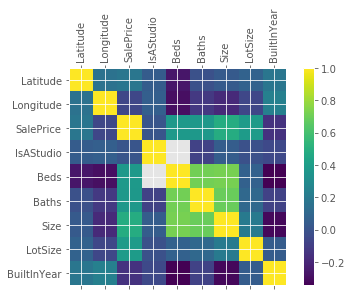

In [91]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

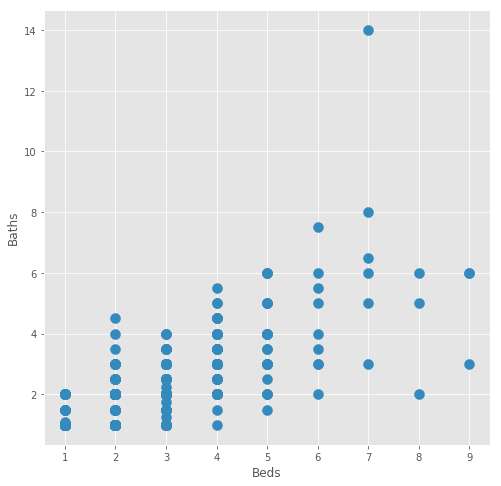

In [99]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

In [ ]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Scatter matrices

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d81390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11501d550>]], dtype=object)

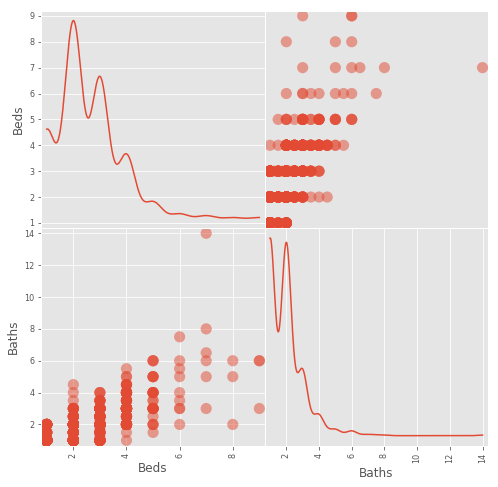

In [100]:
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b6c850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116e1e0d0>]], dtype=object)

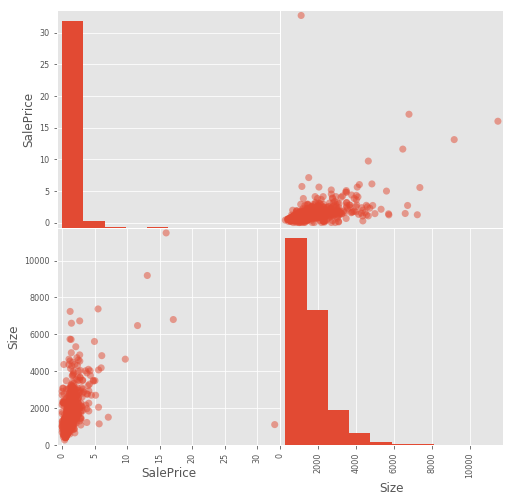

In [101]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [102]:
# TODO
df.Beds.value_counts()

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: Beds, dtype: int64

> Careful on checking for `NaN` values!

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [103]:
# TODO
pd.crosstab(df.Beds, df.Baths)

Baths,1.0,1.1,1.25,1.5,1.75,...,6.0,6.5,7.5,8.0,14.0
Beds,,,,,,,,,,,
1.0,116,1,0,7,0,...,0,0,0,0,0
2.0,133,0,0,19,0,...,0,0,0,0,0
3.0,39,0,1,9,1,...,0,0,0,0,0
4.0,1,0,0,1,0,...,0,0,0,0,0
5.0,0,0,0,1,0,...,3,0,0,0,0
6.0,0,0,0,0,0,...,1,0,1,0,0
7.0,0,0,0,0,0,...,1,1,0,1,1
8.0,0,0,0,0,0,...,1,0,0,0,0
9.0,0,0,0,0,0,...,2,0,0,0,0


## Part I

- Geo-location
  - (https://github.com/pbugnion/gmaps)
  - (http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html)
  - (http://jupyter-gmaps.readthedocs.io/en/latest/api.html)

- To install `gmaps`:
  - `$ conda install -c conda-forge gmaps`

In [ ]:
import yaml
import gmaps

with open('google.yaml', 'r') as f:
    google_credentials = yaml.load(f)

google_api_key = google_credentials['api-key']

gmaps.configure(api_key = google_api_key)

In [ ]:
locations_df = df[ ['Latitude', 'Longitude'] ]

In [ ]:
figure = gmaps.figure()
figure.add_layer(gmaps.symbol_layer(locations_df, fill_color = 'yellow', stroke_color = '#ffcc00', scale = 2))
figure

In [ ]:
figure = gmaps.figure()
figure.add_layer(gmaps.heatmap_layer(locations_df))
figure